In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import random

import torch
import torch.nn as nn
import torch.nn.functional as F

import math
import time
import pandas as pd

/scratch/cluster/vgorti/miniconda3/envs/DIP/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
X = torch.load("/scratch/cluster/vgorti/UTAFSDataNew/NEW_DATA.pt")
F = torch.load("/scratch/cluster/vgorti/UTAFSDataNew/NEW_FREQUENCIES.pt")

In [3]:
print(len(X))
print(len(F))

62
62


In [4]:
import utils

In [5]:
for i, x in enumerate(X):
    if x is None:
        print(str(i) + ": NONE")
        print()
    else:
        num_unique = x.shape[-1]
        num_ports = int(0.5*(-1+np.sqrt(8*num_unique+1)))
        print(str(i) + " : " + str(list(x.shape)))
        print("NUM PORTS: " + str(num_ports))

        data_dict = utils.grab_chip_data("/scratch/cluster/vgorti/UTAFSDataNew/new_data", i)
        print(data_dict["y_freqs"].shape)


0 : [1, 2, 40, 3]
NUM PORTS: 2
(8,)
1 : [1, 2, 501, 10]
NUM PORTS: 4
(18,)
2 : [1, 2, 581, 10]
NUM PORTS: 4
(14,)
3 : [1, 2, 101, 10]
NUM PORTS: 4
(13,)
4 : [1, 2, 1000, 3]
NUM PORTS: 2
(12,)
5 : [1, 2, 1001, 10]
NUM PORTS: 4
(10,)
6 : [1, 2, 501, 10]
NUM PORTS: 4
(20,)
7 : [1, 2, 1000, 10]
NUM PORTS: 4
(7,)
8 : [1, 2, 500, 91]
NUM PORTS: 13
(28,)
9 : [1, 2, 1000, 10]
NUM PORTS: 4
(132,)
10 : [1, 2, 1000, 10]
NUM PORTS: 4
(14,)
11 : [1, 2, 500, 6]
NUM PORTS: 3
(13,)
12 : [1, 2, 500, 3]
NUM PORTS: 2
(8,)
13 : [1, 2, 500, 1]
NUM PORTS: 1
(25,)
14 : [1, 2, 500, 10]
NUM PORTS: 4
(19,)
15 : [1, 2, 1000, 3]
NUM PORTS: 2
(14,)
16 : [1, 2, 501, 3]
NUM PORTS: 2
(21,)
17 : [1, 2, 501, 1]
NUM PORTS: 1
(10,)
18 : [1, 2, 644, 21]
NUM PORTS: 6
(15,)
19 : [1, 2, 341, 3]
NUM PORTS: 2
(23,)
20 : [1, 2, 1500, 3]
NUM PORTS: 2
(62,)
21 : [1, 2, 600, 3]
NUM PORTS: 2
(11,)
22: NONE

23 : [1, 2, 2081, 3]
NUM PORTS: 2
(155,)
24 : [1, 2, 8000, 136]
NUM PORTS: 16
(38,)
25 : [1, 2, 8000, 136]
NUM PORTS: 16
(38,)

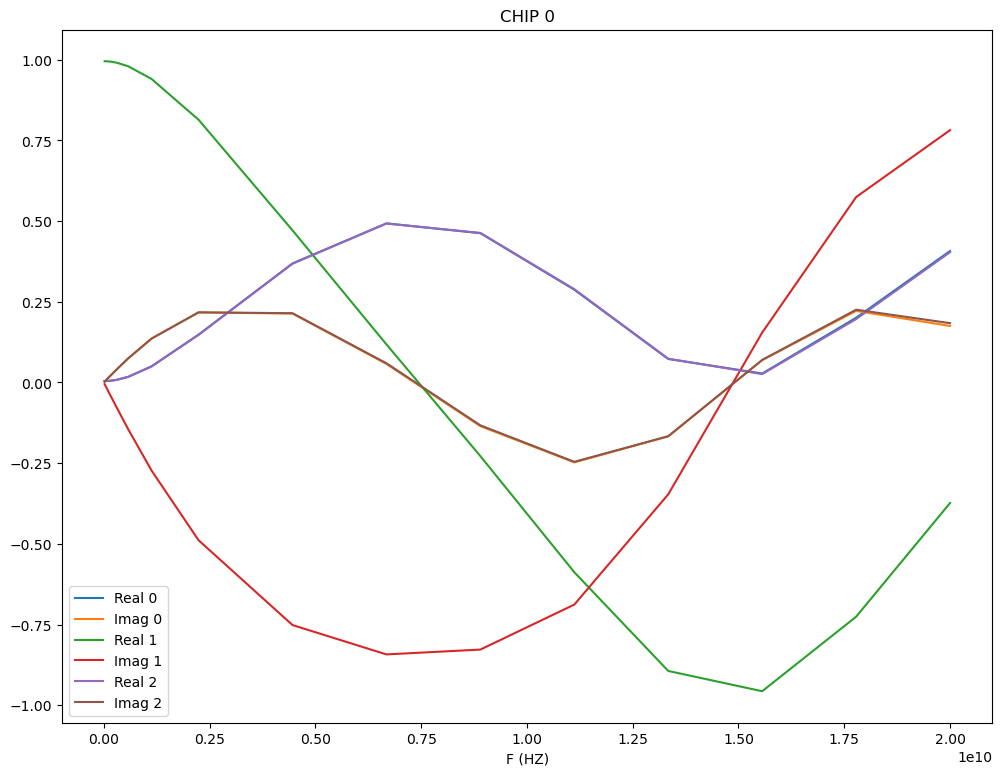

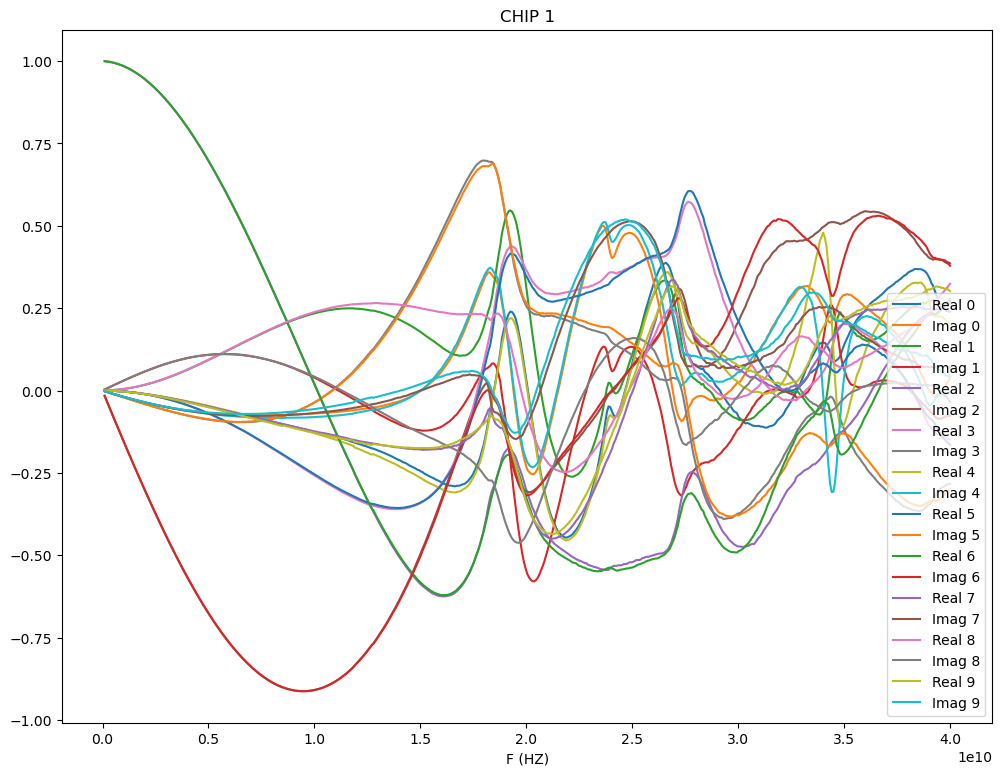

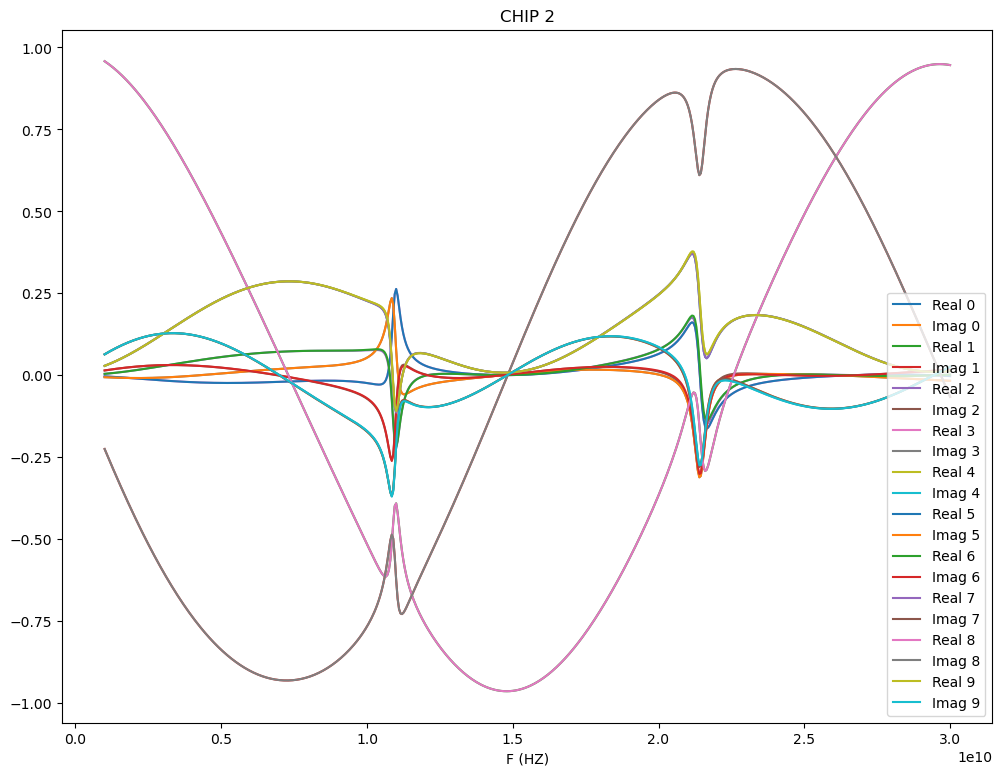

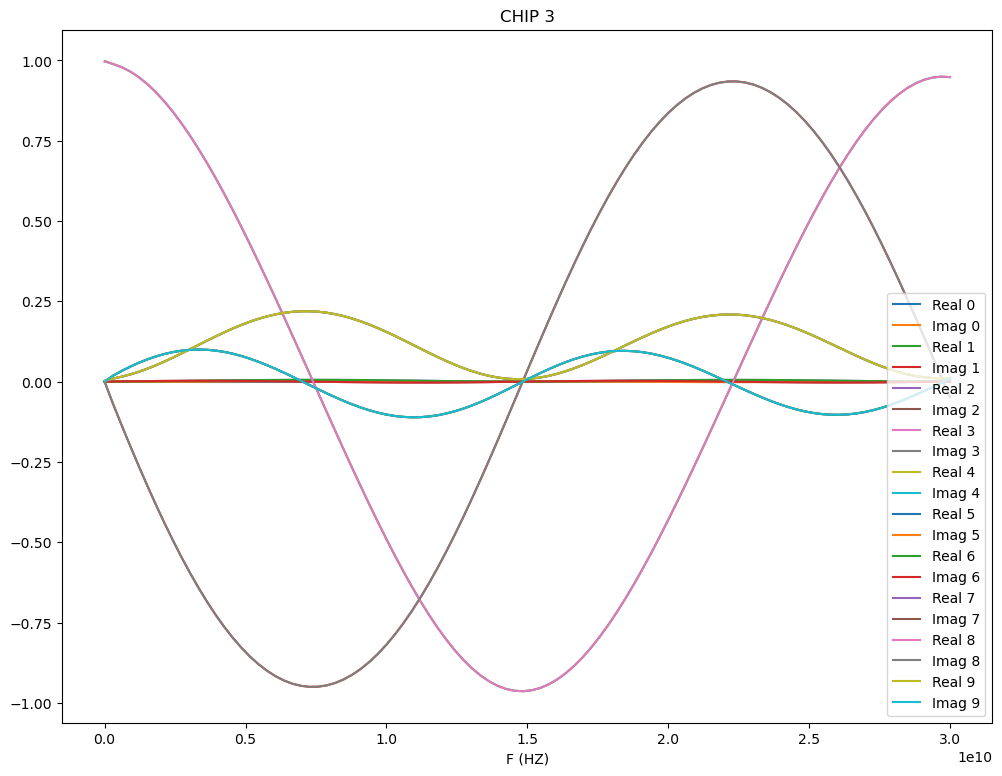

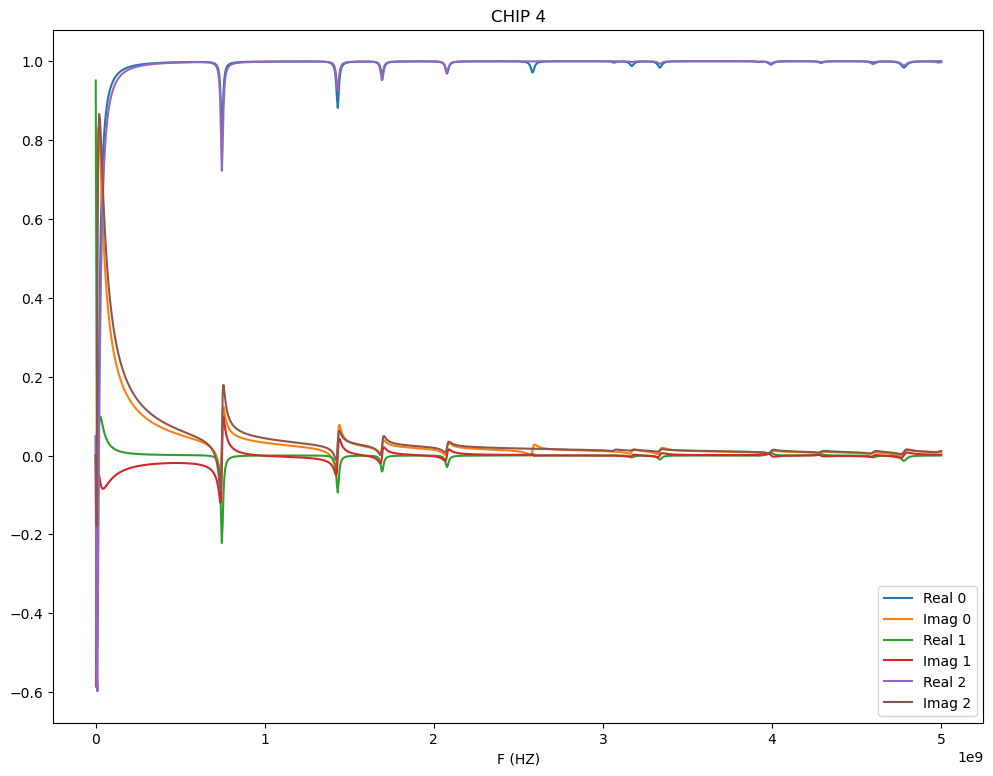

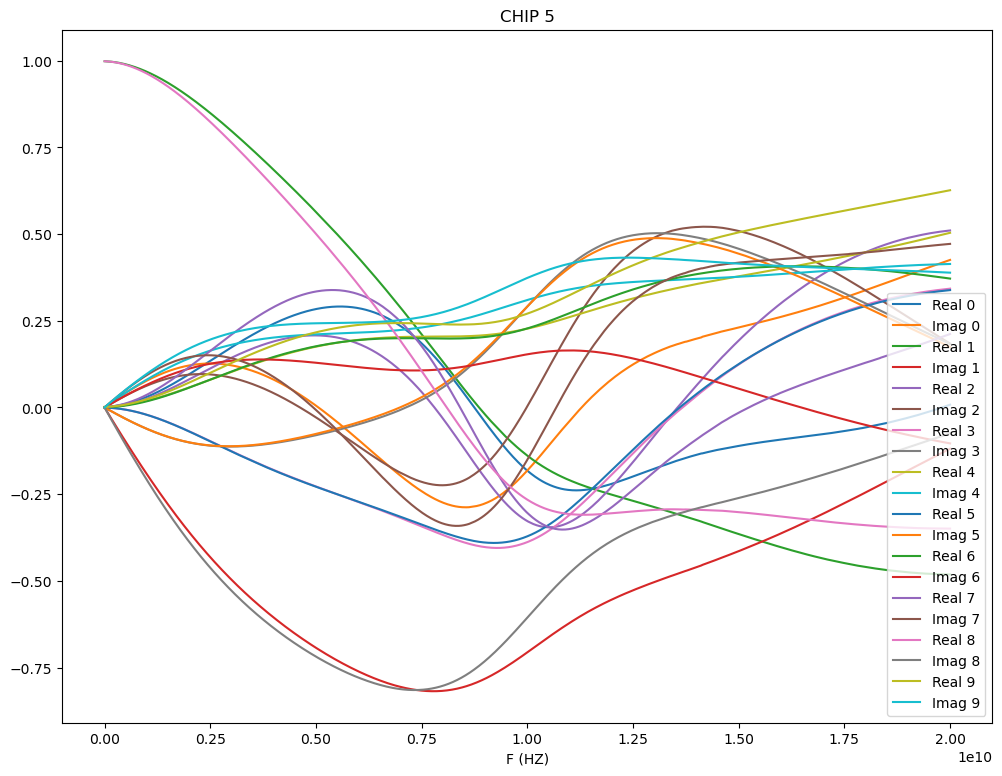

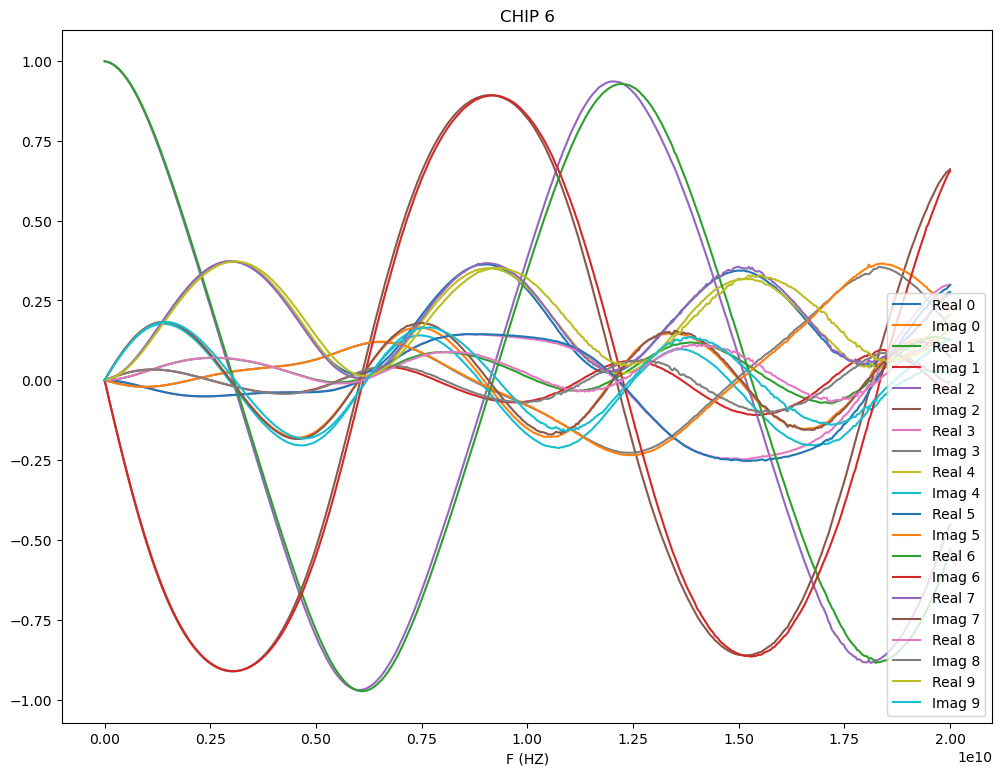

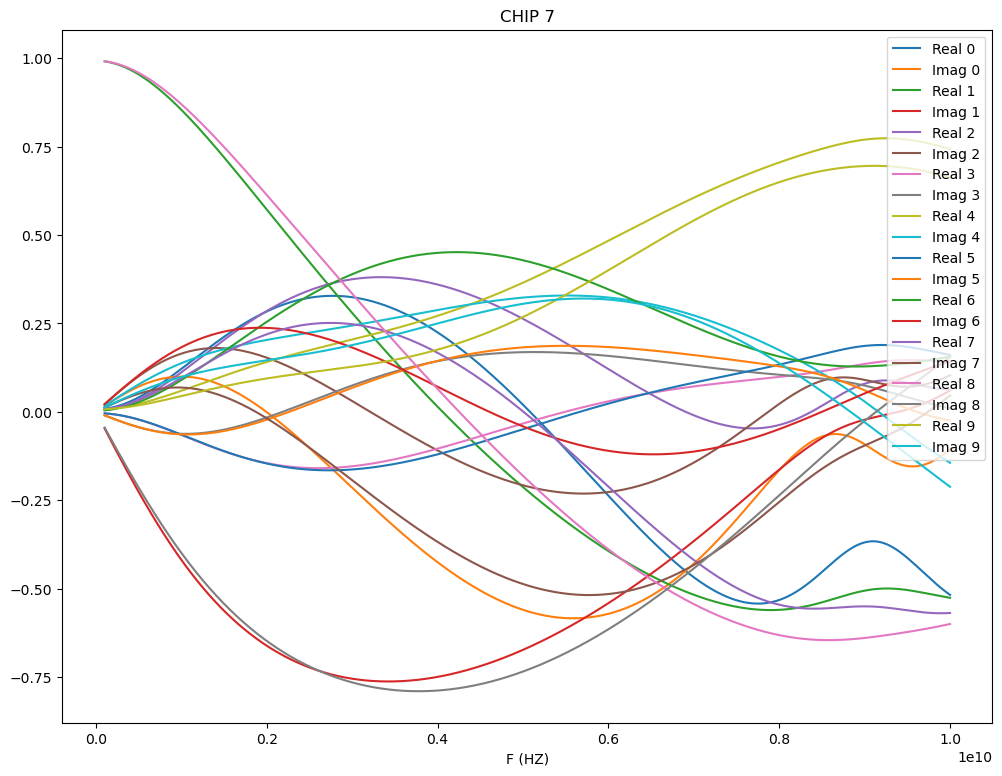

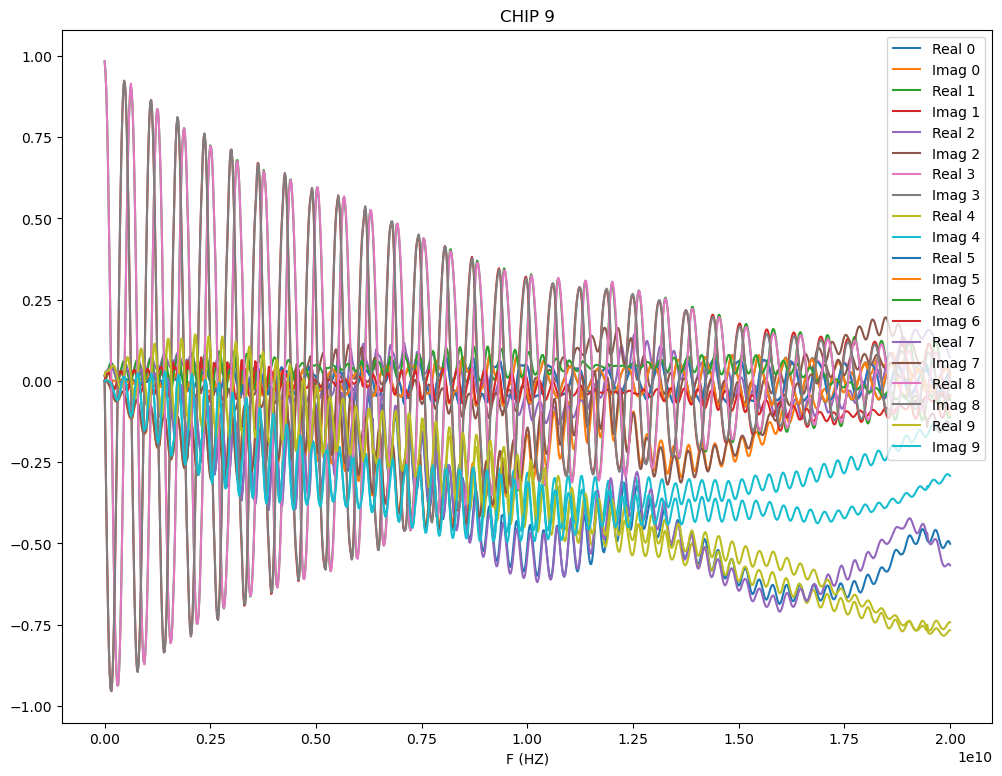

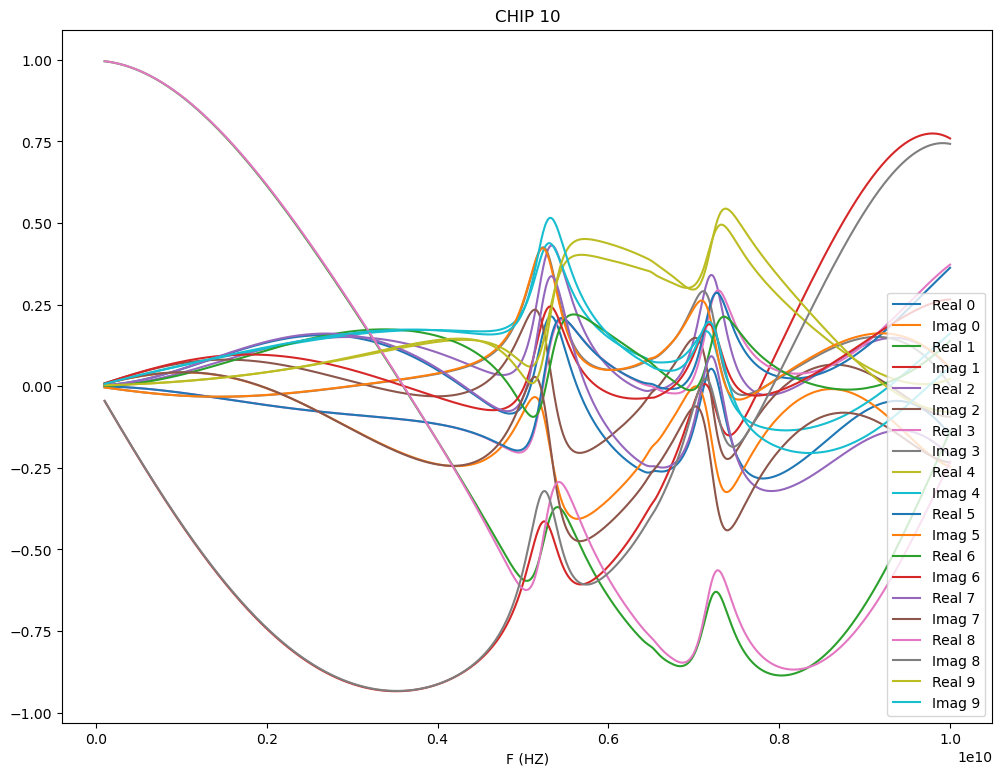

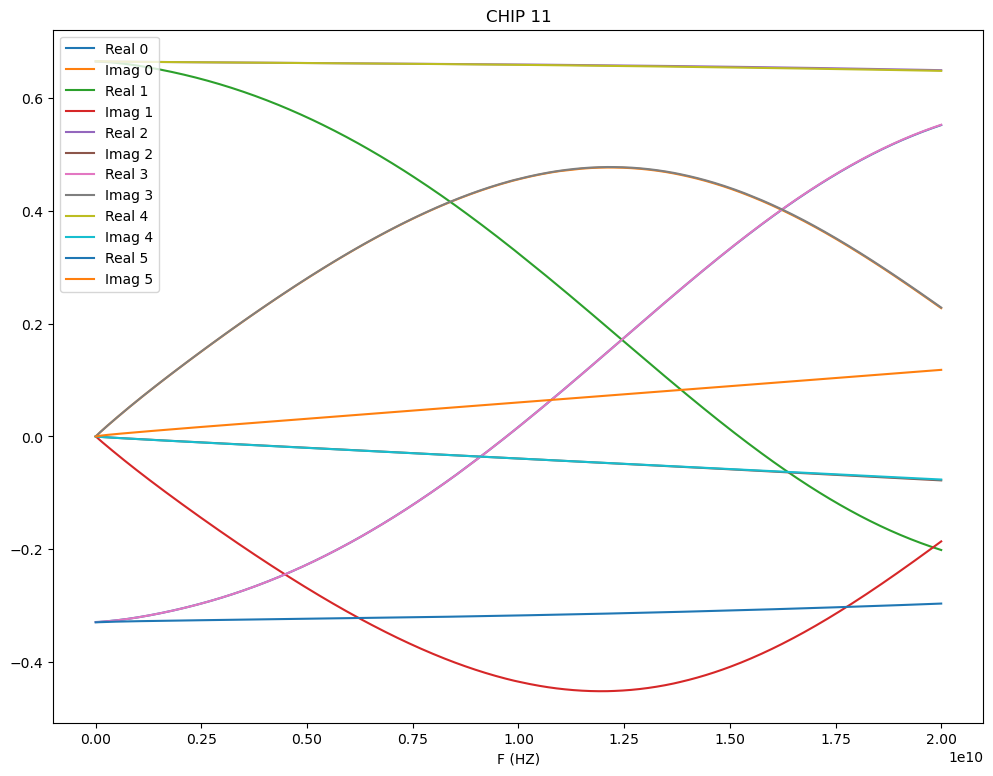

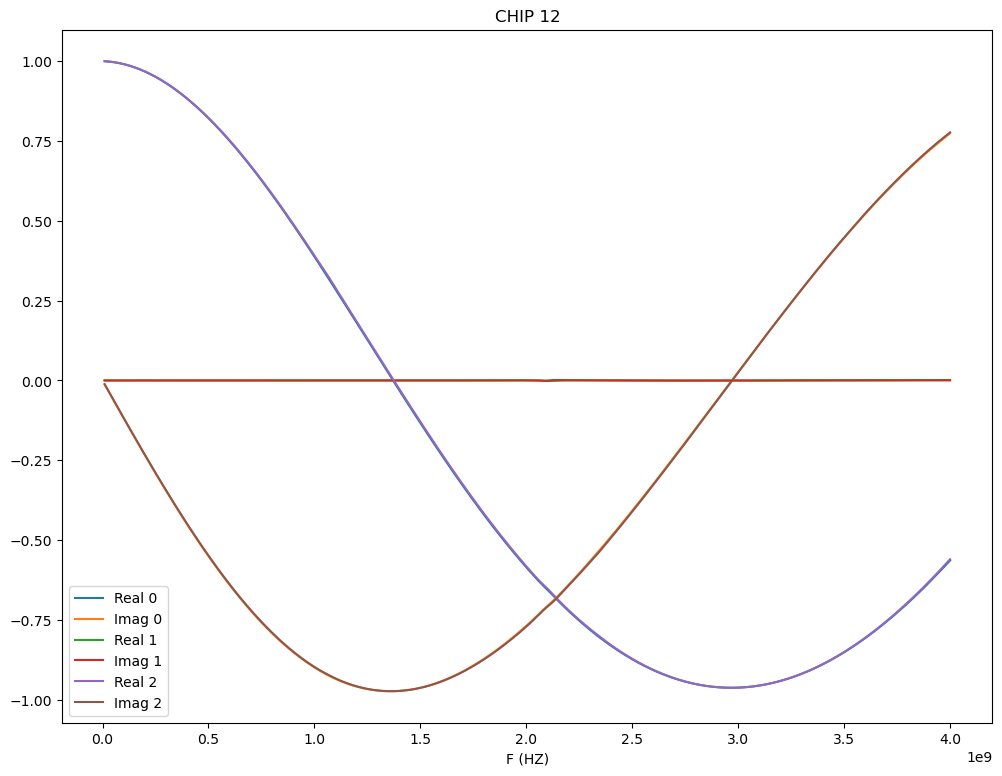

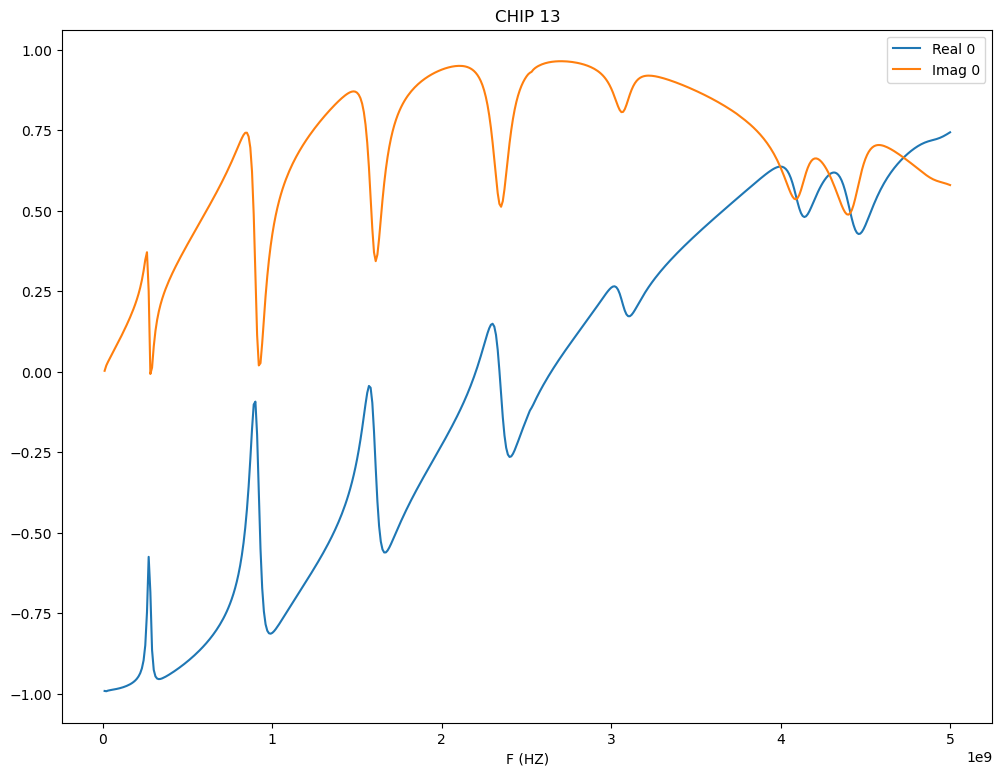

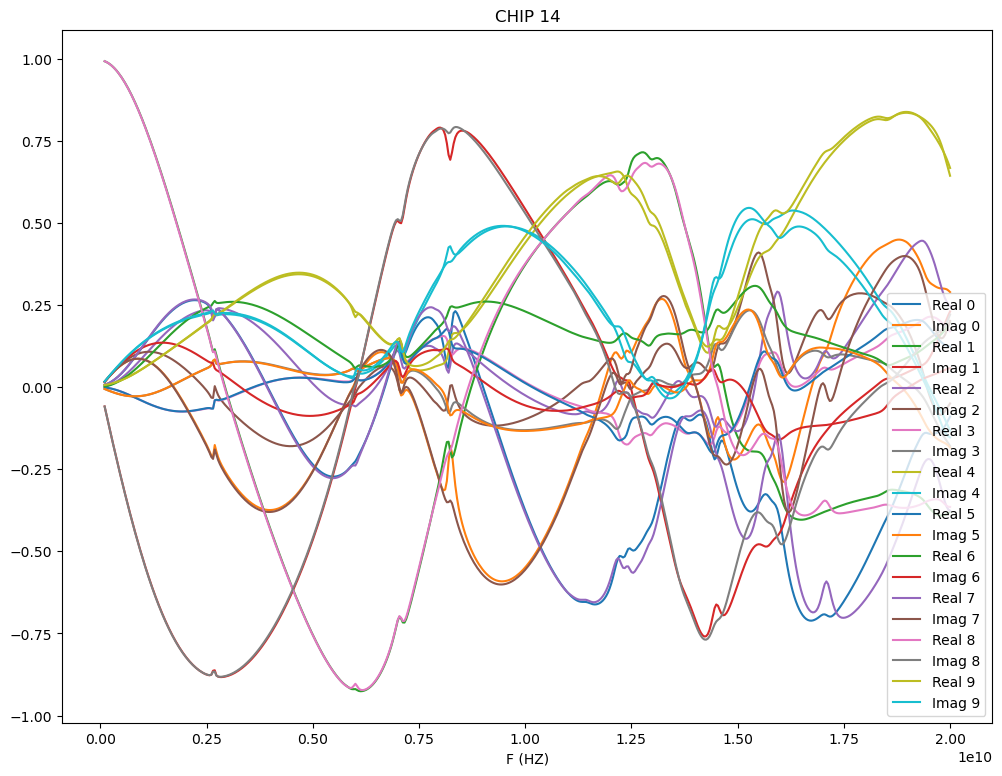

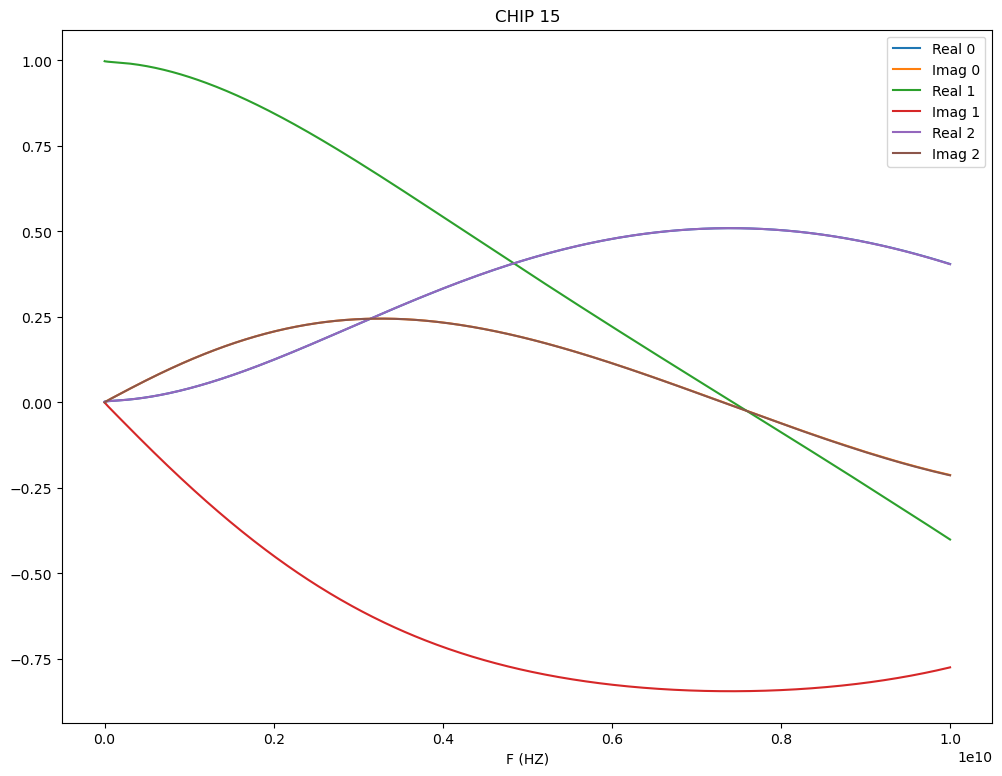

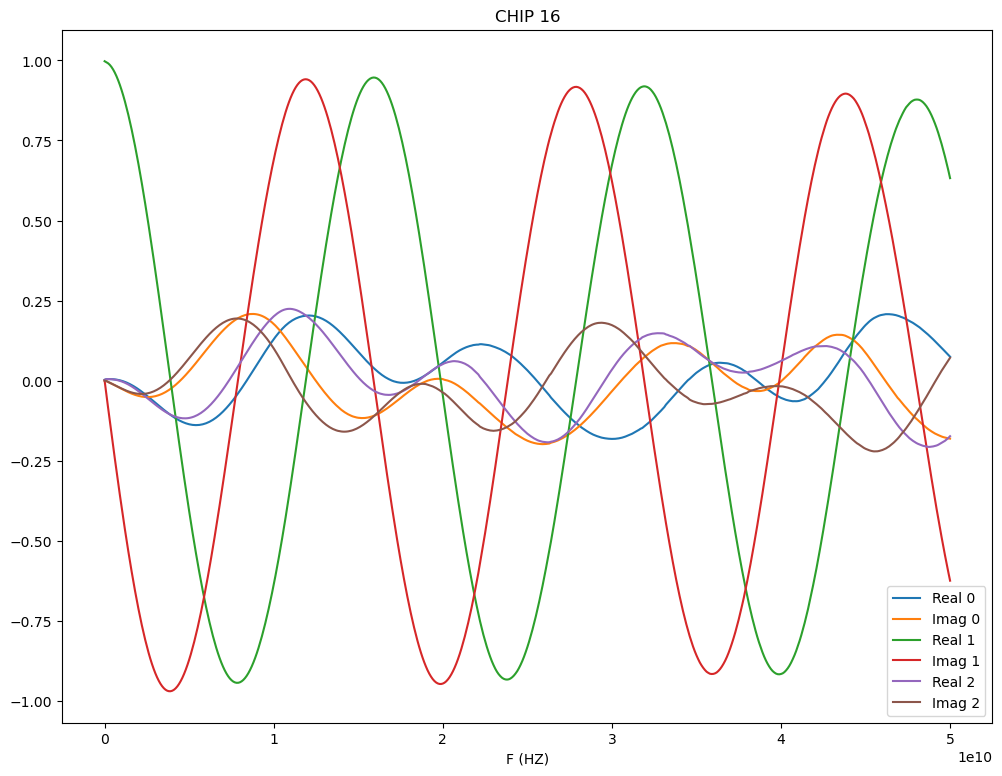

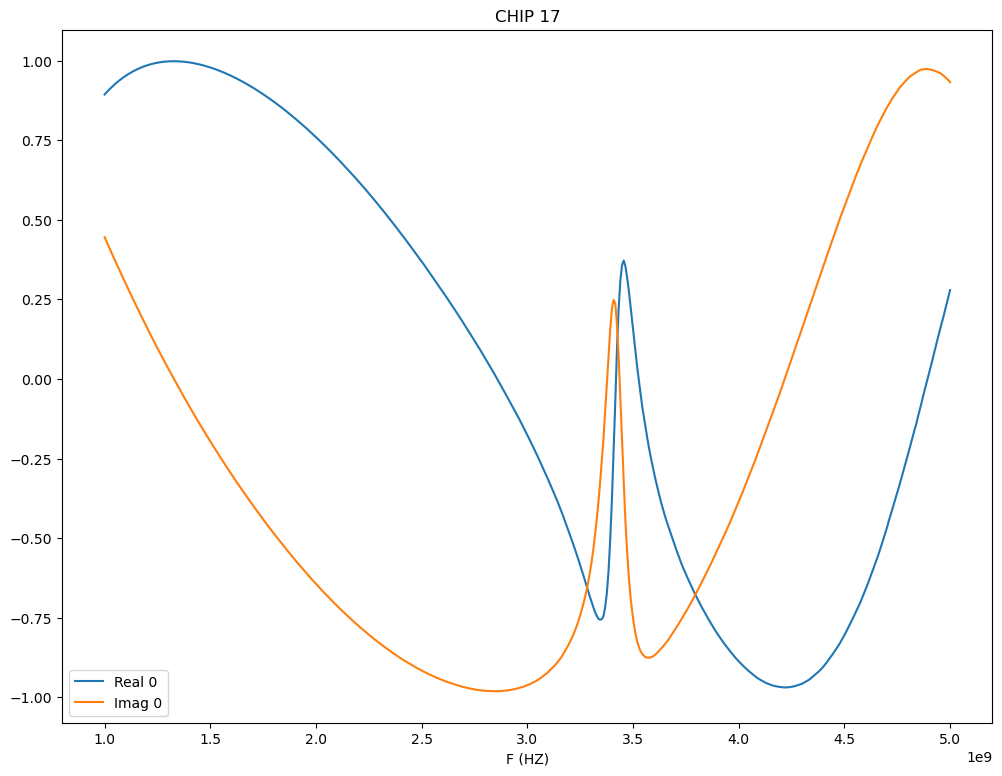

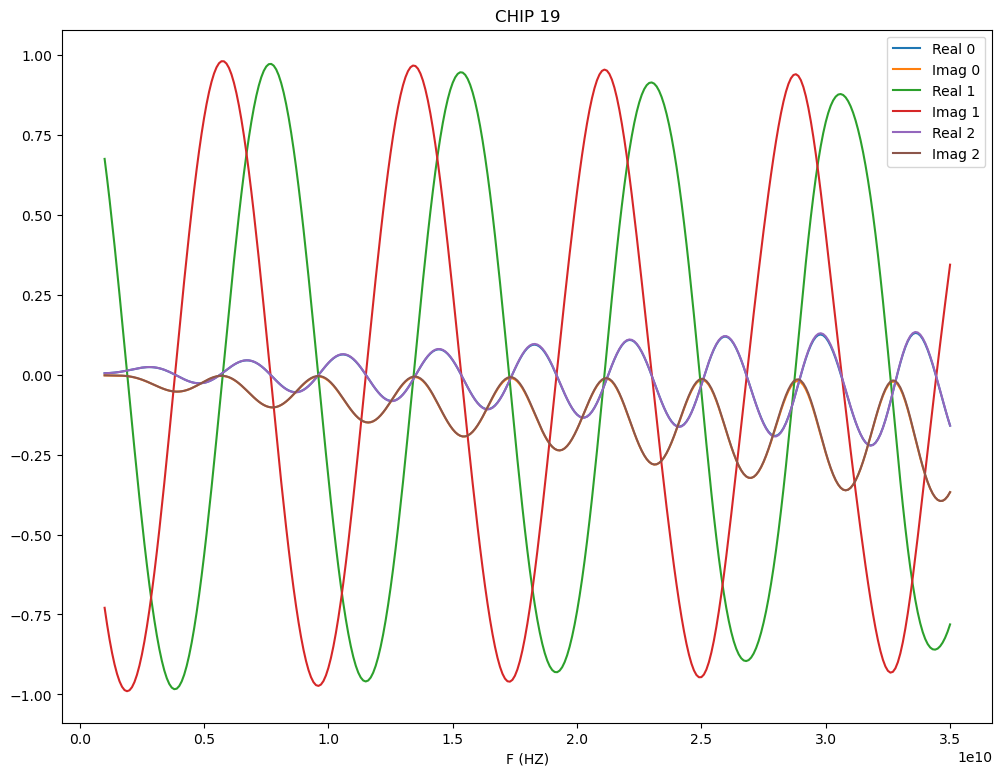

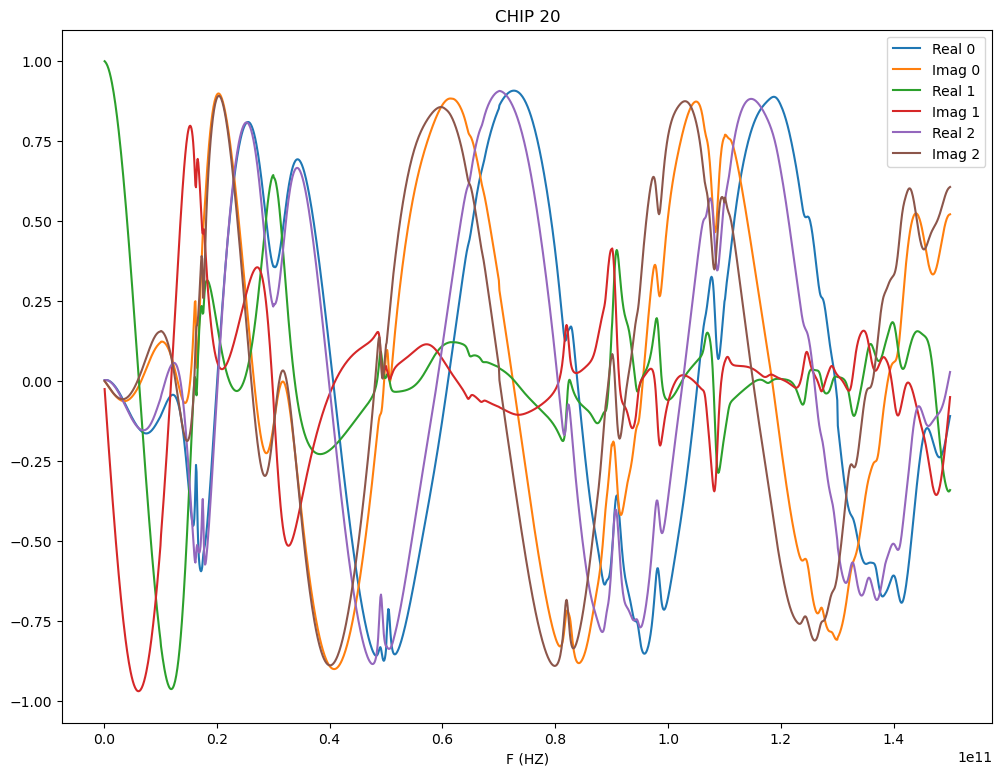

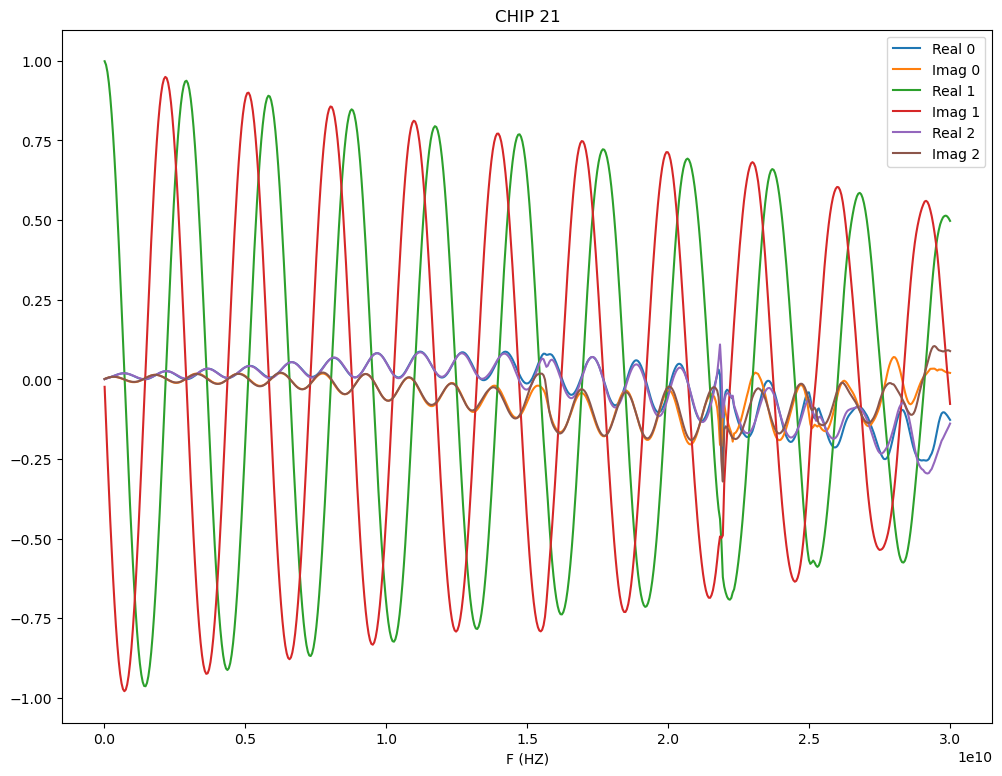

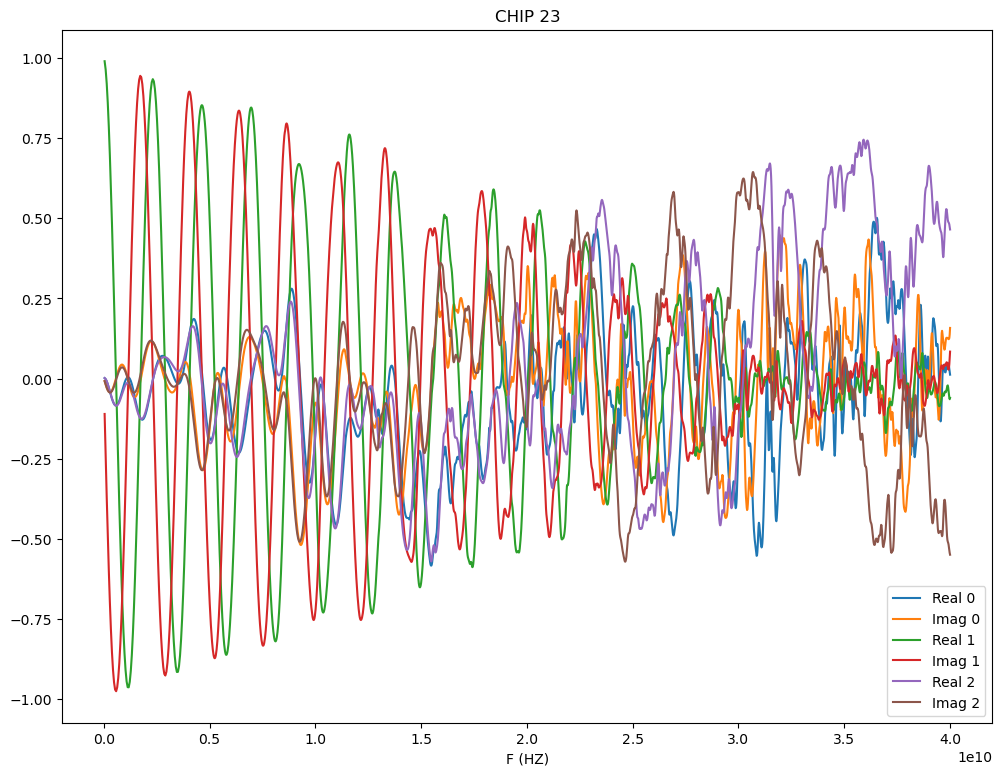

In [6]:
for i in range(len(X)):
    x = X[i]
    f = F[i]
    
    if f is None or x.shape[-1] > 10:
        continue

    plt.figure(figsize=(12,9))
    for j in range(x.shape[-1]):
        plt.plot(f, x[0,0,:,j], label="Real " + str(j))
        plt.plot(f, x[0,1,:,j], label="Imag " + str(j))
    plt.xlabel("F (HZ)")
    plt.legend()
    plt.title("CHIP " + str(i))
    plt.show()